## P4.3 (1 point)

In [11]:
from collections import defaultdict
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# G = nx.erdos_renyi_graph(n=1_000, p=0.01)  
G = nx.read_gml('dolphins.gml') # <3
# G = nx.barabasi_albert_graph(n=1_000, m=10)



In [13]:
def calculate_avg_nearest_neighbour(G):
    degrees = dict(G.degree())
    knn = {}
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:
            knn[node] = sum(degrees[neighbor] for neighbor in neighbors) / len(neighbors)
        else:
            knn[node] = 0  

    return knn

knn = calculate_avg_nearest_neighbour(G)
knn

{'Beak': 7.333333333333333,
 'Beescratch': 5.625,
 'Bumper': 4.5,
 'CCL': 7.666666666666667,
 'Cross': 10.0,
 'DN16': 6.5,
 'DN21': 7.0,
 'DN63': 5.8,
 'Double': 7.333333333333333,
 'Feather': 6.285714285714286,
 'Fish': 6.2,
 'Five': 10.0,
 'Fork': 10.0,
 'Gallatin': 6.25,
 'Grin': 6.75,
 'Haecksel': 6.428571428571429,
 'Hook': 9.5,
 'Jet': 5.333333333333333,
 'Jonah': 8.285714285714286,
 'Knit': 6.25,
 'Kringel': 6.222222222222222,
 'MN105': 9.666666666666666,
 'MN23': 9.0,
 'MN60': 9.333333333333334,
 'MN83': 9.333333333333334,
 'Mus': 5.666666666666667,
 'Notch': 5.333333333333333,
 'Number1': 5.6,
 'Oscar': 6.8,
 'Patchback': 6.333333333333333,
 'PL': 5.2,
 'Quasi': 9.0,
 'Ripplefluke': 5.333333333333333,
 'Scabs': 7.1,
 'Shmuddel': 7.8,
 'SMN5': 9.0,
 'SN100': 6.571428571428571,
 'SN4': 7.363636363636363,
 'SN63': 6.625,
 'SN89': 8.0,
 'SN9': 7.75,
 'SN90': 7.8,
 'SN96': 5.5,
 'Stripes': 7.714285714285714,
 'Thumper': 6.5,
 'Topless': 7.0,
 'TR120': 4.5,
 'TR77': 6.0,
 'TR82': 9.

In [14]:
def calculate_avg_knn(G):
    degrees = dict(G.degree())
    knn = calculate_avg_nearest_neighbour(G)
    
    knn_by_degree = defaultdict(list)
    for node, k in degrees.items():
        knn_by_degree[k].append(knn[node])

    avg_knn = {k: np.mean(knn_by_degree[k]) for k in knn_by_degree}
    return avg_knn

avg_knn = calculate_avg_knn(G)
avg_knn

{6: 7.708333333333333,
 8: 6.5625,
 4: 6.6,
 3: 6.5,
 1: 8.555555555555555,
 5: 6.5,
 7: 7.2653061224489806,
 12: 6.75,
 9: 5.833333333333334,
 10: 6.199999999999999,
 11: 7.181818181818182,
 2: 5.75}

### Analyze the dependency

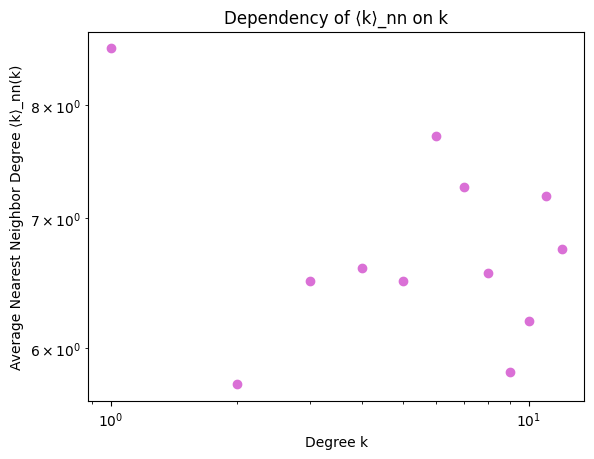

In [15]:

avg_knn = calculate_avg_knn(G)
plt.scatter(avg_knn.keys(), avg_knn.values(), marker='o', color='orchid')
plt.xlabel("Degree k")
plt.ylabel("Average Nearest Neighbor Degree ⟨k⟩_nn(k)")
plt.title("Dependency of ⟨k⟩_nn on k")

# max_k = max(avg_knn.keys()) 
# # plt.xticks(np.arange(0, max_k + 1, 5))
plt.xscale("log")
plt.yscale("log")
plt.show()


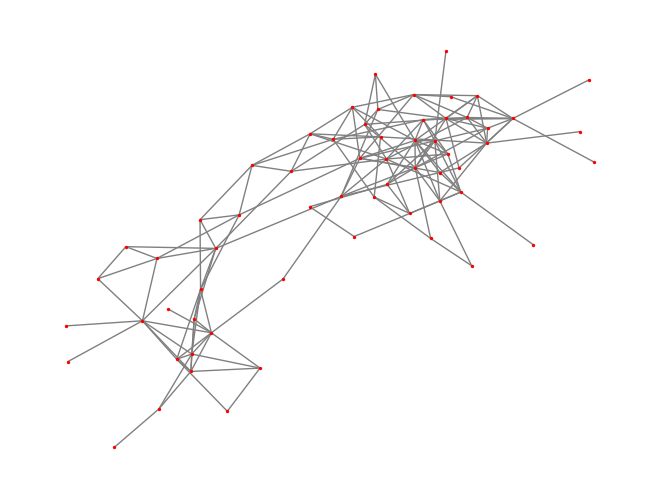

In [16]:
nx.draw(G, nx.spring_layout(G, k=0.3), node_color='red', edge_color='gray', node_size=2)

## P4.4 (1 point)

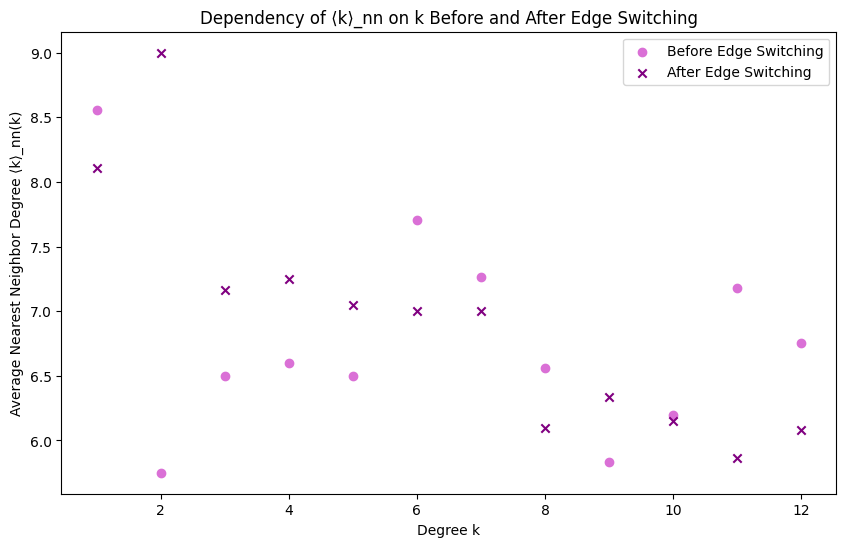

In [ ]:
avg_knn_before = avg_knn

num_switches = 1000  
G_switched = G.copy()
# samemu przełaczanie lepiej
nx.connected_double_edge_swap(G_switched, nswap=num_switches)

avg_knn_after = calculate_avg_knn(G_switched)

plt.figure(figsize=(10, 6))
plt.scatter(avg_knn_before.keys(), avg_knn_before.values(), marker='o', color='orchid', label="Before Edge Switching")
plt.scatter(avg_knn_after.keys(), avg_knn_after.values(), marker='x', color='purple', label="After Edge Switching")
plt.xlabel("Degree k")
plt.ylabel("Average Nearest Neighbor Degree ⟨k⟩_nn(k)")
plt.title("Dependency of ⟨k⟩_nn on k Before and After Edge Switching")
plt.legend()
plt.show()

## P4.6 (1 point)

In [18]:
assortativity_original = nx.degree_assortativity_coefficient(G)
print(f"Assortativity Coefficient (before): {assortativity_original:.2f}")

assortativity_switched = nx.degree_assortativity_coefficient(G_switched)
print(f"Assortativity Coefficient (after): {assortativity_switched:.2f}")

Assortativity Coefficient (before): -0.04
Assortativity Coefficient (after): -0.22


## P4.8 (1 point)

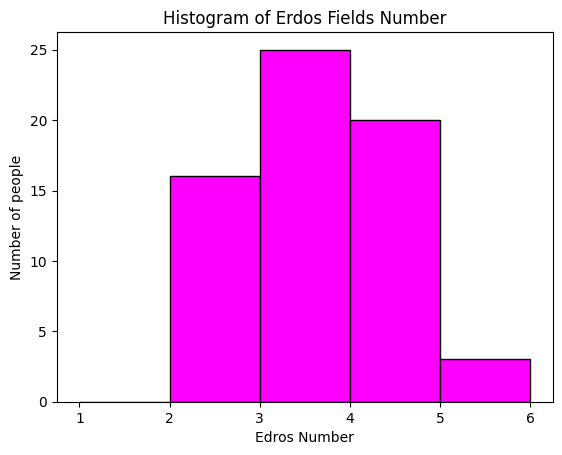

In [25]:
# Fields

file_path = './erdos_numbers_fields.txt'  

with open(file_path, 'r') as file:
    data = [int(line.strip()) for line in file.readlines()]

plt.hist(data, bins=range(1, max(data) +2), edgecolor='black', color='fuchsia')

plt.title('Histogram of Erdos Fields Number')
plt.xlabel('Edros Number')
plt.ylabel('Number of people')
plt.show()


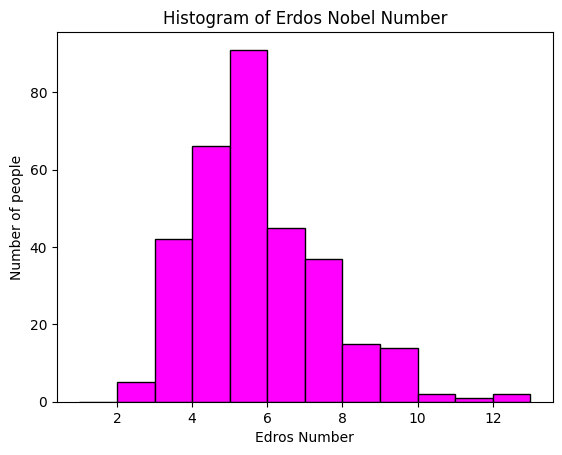

In [ ]:
# Nobel number

file_path = './erdos_numbers_nobel.txt'  

with open(file_path, 'r') as file:
    data = [int(line.strip()) for line in file.readlines()]

plt.hist(data, bins=range(1, max(data) +2), edgecolor='black', color='fuchsia')

plt.title('Histogram of Erdos Nobel Number')
plt.xlabel('Edros Number')
plt.ylabel('Number of people')
plt.show()
